```
Name  - Aryan Chauhan
PRN   - 1032222639
Div   - ECE (AIML) Sec B
Batch - G1
```

# **Credit Card Approval using DTC**
In this project, I have used Decision Tree Classifier to classify whether a claimant is eligible for credit card.

## Content
1. **Dependencies**
  - 1.1 Importing Libraries.
  - 1.2 Feature Definitions.
  - 1.3 Understanding the dataset.
  - 1.4 Handling string values.
2. **Data Preprocessing**
  - 2.1 Label Encoding.
  - 2.2 Dropping Values.
  - 2.3 Distribution Graph.
  - 2.4 Plotting correlation graph.
  - 2.5 Merging dataset.
  - 2.6 Understanding test dataset.
  - 2.7 Handling missing values.
3. **Model Implementation**
  - 3.1 Train-test split of data.
  - 3.2 Importing model.
  - 3.3 Fitting the model.
  - 3.4 Prediction.
  - 3.5 Metrics determined.
  - 3.6 Saving the model.
  - 3.7 Testing the model.

## 1. Dependencies

### 1.1 Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.2 Feature Definitions
| Feature Name          | Explanation                                 | Remarks                                                                                       |
|-----------------------|---------------------------------------------|-----------------------------------------------------------------------------------------------|
| `ID`                  | Client number                              |                                                                                               |
| `CODE_GENDER`         | Gender                                     |                                                                                               |
| `FLAG_OWN_CAR`        | Is there a car                             |                                                                                               |
| `FLAG_OWN_REALTY`     | Is there a property                        |                                                                                               |
| `CNT_CHILDREN`        | Number of children                         |                                                                                               |
| `AMT_INCOME_TOTAL`    | Annual income                              |                                                                                               |
| `NAME_INCOME_TYPE`    | Income category                            |                                                                                               |
| `NAME_EDUCATION_TYPE` | Education level                            |                                                                                               |
| `NAME_FAMILY_STATUS`  | Marital status                             |                                                                                               |
| `NAME_HOUSING_TYPE`   | Way of living                              |                                                                                               |
| `DAYS_BIRTH`          | Birthday                                   | Count backwards from current day (0); -1 means yesterday.                                    |
| `DAYS_EMPLOYED`       | Start date of employment                   | Count backwards from current day (0). If positive, it means the person is currently unemployed. |
| `FLAG_MOBIL`          | Is there a mobile phone                    |                                                                                               |
| `FLAG_WORK_PHONE`     | Is there a work phone                      |                                                                                               |
| `FLAG_PHONE`          | Is there a phone                           |                                                                                               |
| `FLAG_EMAIL`          | Is there an email                          |                                                                                               |
| `OCCUPATION_TYPE`     | Occupation                                 |                                                                                               |
| `CNT_FAM_MEMBERS`     | Family size                                |                                                                                               |


In [ ]:
data = pd.read_csv('/content/train.csv')

### 1.3 Understanding the dataset

In [ ]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [ ]:
data.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [ ]:
data.shape

(438557, 18)

### 1.4 Handling string values

In [ ]:
print(f"\nUnique data in NAME_EDUCATION_TYPE is : {data['NAME_EDUCATION_TYPE'].unique()}")
print(f"\nUnique data in NAME_INCOME_TYPE is : {data['NAME_INCOME_TYPE'].unique()}")
print(f"\nUnique data in NAME_FAMILY_STATUS is : {data['NAME_FAMILY_STATUS'].unique()}")
print(f"\nUnique data in NAME_HOUSING_TYPE is : {data['NAME_HOUSING_TYPE'].unique()}")
print(f"\nUnique data in OCCUPATION_TYPE is : {data['OCCUPATION_TYPE'].unique()}")


Unique data in NAME_EDUCATION_TYPE is : ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Unique data in NAME_INCOME_TYPE is : ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']

Unique data in NAME_FAMILY_STATUS is : ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']

Unique data in NAME_HOUSING_TYPE is : ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']

Unique data in OCCUPATION_TYPE is : [nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']


## 2. Preprocessing

### 2.1 Label Encoding to convert strings into numeric categories

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data_pre = data

data_pre['NAME_EDUCATION_TYPE'] = label_encoder.fit_transform(data_pre['NAME_EDUCATION_TYPE'])
# I will get 5 encoded values as there are 5 categories

data_pre.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,1,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,1,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,4,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,4,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,4,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
data_pre['NAME_EDUCATION_TYPE'].unique()

array([1, 4, 2, 3, 0])

In [ ]:
# Here also I will get 5 categories
data_pre['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(data_pre['NAME_FAMILY_STATUS'])
data_pre['NAME_FAMILY_STATUS'].unique()


array([0, 1, 3, 2, 4])

In [ ]:
# Here also i will get 5 categories
data_pre['NAME_INCOME_TYPE'] = label_encoder.fit_transform(data_pre['NAME_INCOME_TYPE'])
data_pre['NAME_INCOME_TYPE'].unique()

array([4, 0, 1, 2, 3])

In [ ]:
# Here, I will get 6 categories
data_pre['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(data_pre['NAME_HOUSING_TYPE'])
data_pre['NAME_HOUSING_TYPE'].unique()

array([4, 1, 2, 5, 0, 3])

In [ ]:
data_pre['OCCUPATION_TYPE'] = data_pre['OCCUPATION_TYPE'].fillna(data_pre['OCCUPATION_TYPE'].mode()[0])
data_pre['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Security staff', 'Sales staff', 'Accountants',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [ ]:
data_pre.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [ ]:
data_pre['OCCUPATION_TYPE'] = label_encoder.fit_transform(data_pre['OCCUPATION_TYPE'])
data_pre['OCCUPATION_TYPE'].unique()

array([ 8, 16, 14,  0, 10,  4,  3,  6,  1, 12,  2,  9, 11, 15, 17,  5, 13,
        7])

In [ ]:
data_pre['CODE_GENDER'] = label_encoder.fit_transform(data_pre['CODE_GENDER'])
data_pre['CODE_GENDER'].unique()

array([1, 0])

In [ ]:
data_pre['FLAG_OWN_CAR'] = label_encoder.fit_transform(data_pre['FLAG_OWN_CAR'])
data_pre['FLAG_OWN_CAR'].unique()

array([1, 0])

In [ ]:
data_pre['FLAG_OWN_REALTY'] = label_encoder.fit_transform(data_pre['FLAG_OWN_REALTY'])
data_pre['FLAG_OWN_REALTY'].unique()

array([1, 0])

In [ ]:
data_pre.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,16,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0


### 2.2 Dropping ID

In [ ]:
final_df = data_pre.drop(['ID'], axis=1)
final_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0
1,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0
2,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,16,2.0
3,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0
4,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0


In [ ]:
data_pre.shape

(438557, 18)

In [ ]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  int64  
 2   FLAG_OWN_CAR         438557 non-null  int64  
 3   FLAG_OWN_REALTY      438557 non-null  int64  
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  int64  
 7   NAME_EDUCATION_TYPE  438557 non-null  int64  
 8   NAME_FAMILY_STATUS   438557 non-null  int64  
 9   NAME_HOUSING_TYPE    438557 non-null  int64  
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
data_pre.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [ ]:
data_pre.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,438557.000000,438557.000000,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.328616,0.371897,0.693351,0.427390,1.875243e+05,2.399533,3.116268,1.365485,1.261651,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,7.768281,2.194465
std,5.716370e+05,0.469711,0.483312,0.461103,0.724882,1.100869e+05,1.730260,1.336736,0.959034,0.906544,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,3.611218,0.897207
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.610000e+04,0.000000,0.000000,0.000000,0.000000,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,1.000000,1.000000,1.000000,1.000000,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,6.000000,2.000000
50%,6.047745e+06,0.000000,0.000000,1.000000,0.000000,1.607805e+05,4.000000,4.000000,1.000000,1.000000,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,8.000000,2.000000
75%,6.456971e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,4.000000,4.000000,1.000000,1.000000,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,8.000000,3.000000
max,7.999952e+06,1.000000,1.000000,1.000000,19.000000,6.750000e+06,4.000000,4.000000,4.000000,5.000000,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,17.000000,20.000000


In [ ]:
data_pre.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
438552,False
438553,False
438554,False
438555,False


### 2.3 Distribution Graph

<ipython-input-60-6994c4ebb61f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="CODE_GENDER", data=data_pre, palette="viridis", ax=axs[0, 0])
<ipython-input-60-6994c4ebb61f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="FLAG_OWN_CAR", data=data_pre, palette="viridis", ax=axs[0, 1])
<ipython-input-60-6994c4ebb61f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="FLAG_OWN_REALTY", data=data_pre, palette="viridis", ax=axs[1, 0])
<ipython-input-60-6994c4ebb61f>:24: FutureWarning: 

Passing `palette` without assigning `hue` i

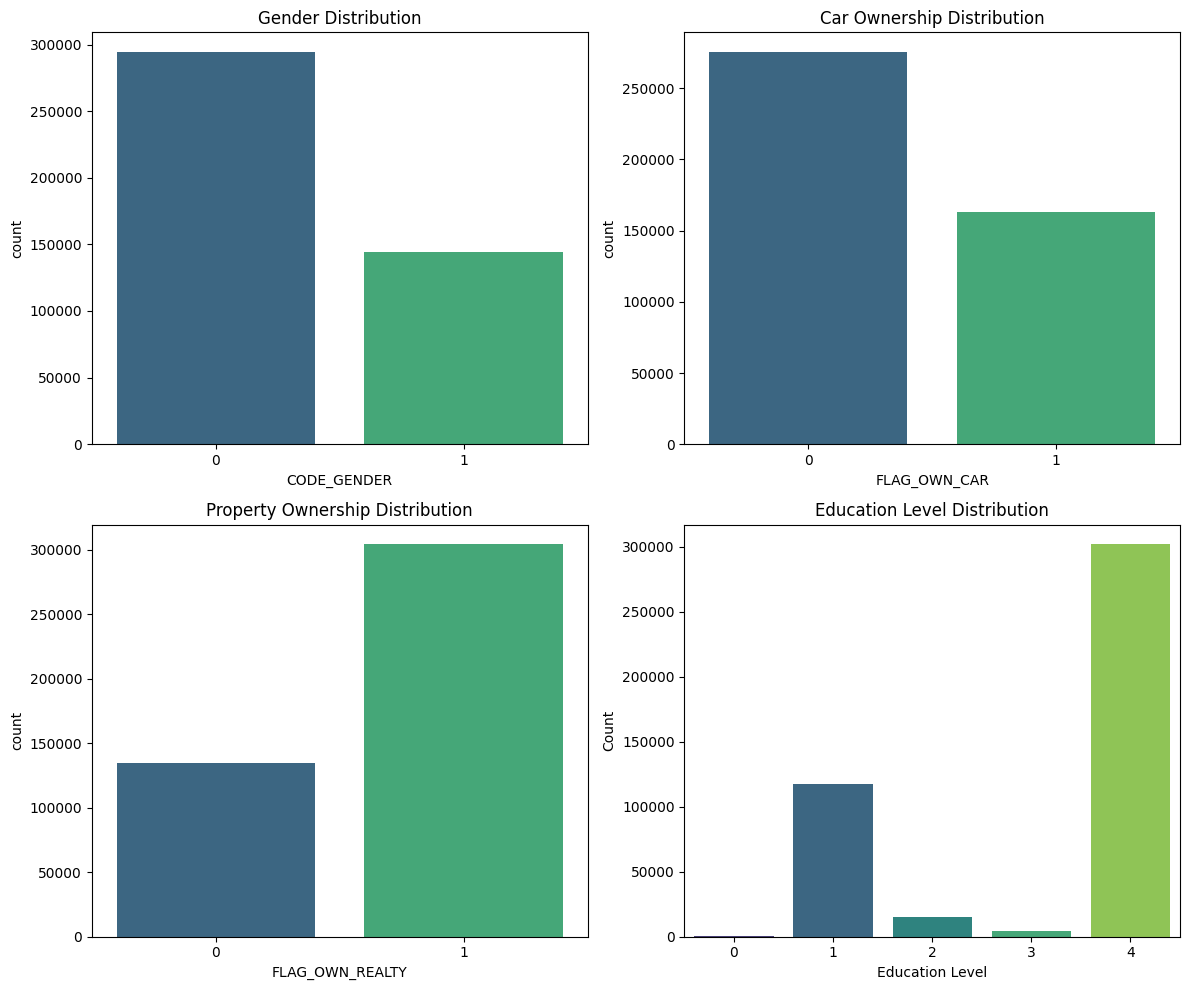

In [ ]:
# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 2

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Plot each subplot
sns.countplot(x="CODE_GENDER", data=data_pre, palette="viridis", ax=axs[0, 0])
axs[0, 0].set_title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

sns.countplot(x="FLAG_OWN_CAR", data=data_pre, palette="viridis", ax=axs[0, 1])
axs[0, 1].set_title('Car Ownership Distribution')
plt.xlabel('Car Ownership')
plt.ylabel('Count')

sns.countplot(x="FLAG_OWN_REALTY", data=data_pre, palette="viridis", ax=axs[1, 0])
axs[1, 0].set_title('Property Ownership Distribution')
plt.xlabel('Property Ownership')
plt.ylabel('Count')

sns.countplot(x="NAME_EDUCATION_TYPE", data=data_pre, palette="viridis", ax=axs[1, 1])
axs[1, 1].set_title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### 2.4 Plotting correlation graph

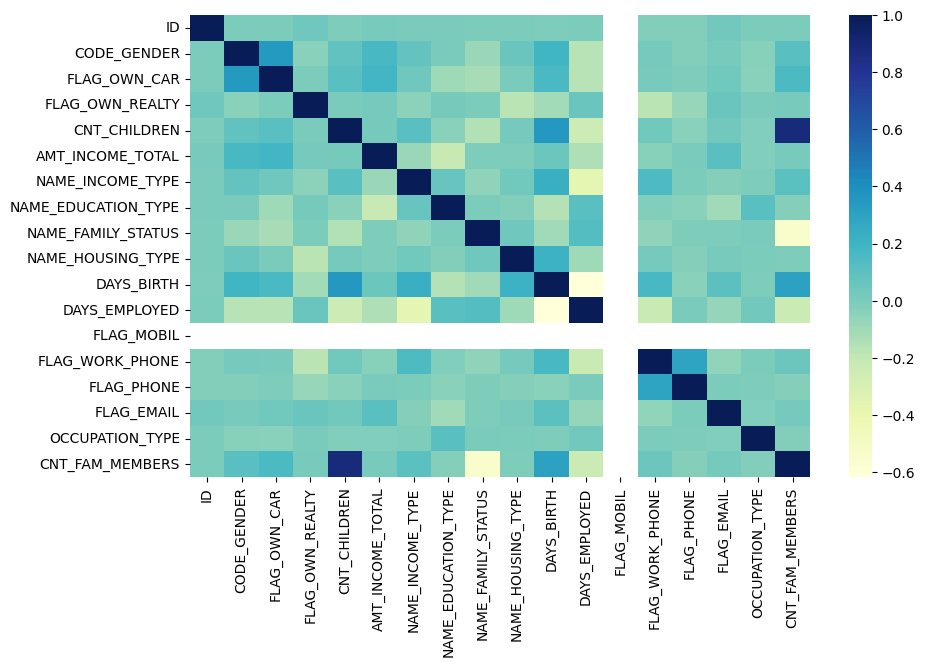

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data_pre.corr(), cmap="YlGnBu")
plt.show()

In [ ]:
data_pre.head(100)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,16,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5008905,0,0,1,0,297000.0,0,4,3,4,-15519,-3234,1,0,0,0,8,1.0
96,5008906,0,0,1,0,297000.0,0,4,3,4,-15519,-3234,1,0,0,0,8,1.0
97,5008907,0,0,1,0,297000.0,0,4,3,4,-15519,-3234,1,0,0,0,8,1.0
98,5008908,0,0,1,0,297000.0,0,4,3,4,-15519,-3234,1,0,0,0,8,1.0


In [ ]:
test = pd.read_csv('/content/test.csv')

In [ ]:
test.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
test.shape

(1048575, 3)

In [ ]:
data.shape

(438557, 18)

In [ ]:
test.isnull().sum()

,0
ID,0
MONTHS_BALANCE,0
STATUS,0


In [ ]:
test.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


### 2.5 Merging ```test.csv``` and ```train.csv```

In [ ]:
data_merge = pd.merge(data_pre, test[['ID', 'STATUS']], on='ID',how='left')

In [ ]:
data_merge.head(1000)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,C
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,C
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,C
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,C
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5008874,0,0,1,2,126000.0,0,1,1,1,-12411,-1773,1,0,0,1,10,4.0,C
996,5008874,0,0,1,2,126000.0,0,1,1,1,-12411,-1773,1,0,0,1,10,4.0,C
997,5008874,0,0,1,2,126000.0,0,1,1,1,-12411,-1773,1,0,0,1,10,4.0,C
998,5008874,0,0,1,2,126000.0,0,1,1,1,-12411,-1773,1,0,0,1,10,4.0,C


### 2.6 Understanding $y_p$

In [ ]:
data_merge['STATUS'].unique()

array(['C', '1', '0', 'X', nan, '5', '4', '3', '2'], dtype=object)

```0```: 1-29 days past due

```1```: 30-59 days past due

```2```: 60-89 days overdue

```3```: 90-119 days overdue

```4```: 120-149 days overdue

```5```: Overdue or bad debts, write-offs for more than 150 days

```C```: paid off that month

```X```: No loan for the month

In [ ]:
data_merge.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


### 2.7 Missing values

In [ ]:
data_merge['STATUS'] = data_merge['STATUS'].fillna(data_merge['STATUS'].mode()[0])

data_merge.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,C
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,C
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,C
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,C
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,C


In [ ]:
data_merge['STATUS'].unique()

array(['C', '1', '0', 'X', '5', '4', '3', '2'], dtype=object)

In [ ]:
data_merge.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [ ]:
data_merge.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,C
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,C
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,C
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,C
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,C


In [ ]:
data_merge['STATUS'] = label_encoder.fit_transform(data_merge['STATUS'])

In [ ]:
data_merge['STATUS'].unique()

array([6, 1, 0, 7, 5, 4, 3, 2])

In [ ]:
data_merge.duplicated()

,0
0,False
1,True
2,True
3,True
4,True
...,...
1179810,False
1179811,False
1179812,False
1179813,False


In [ ]:
data_cleaned = data_merge.drop_duplicates(subset='ID', keep='first')

In [ ]:
data_cleaned = data_cleaned.drop(['ID'], axis=1)

In [ ]:
data_cleaned

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,6
16,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,6
31,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,16,2.0,6
61,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0,0
66,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179810,1,0,1,0,135000.0,1,4,2,1,-22717,365243,1,0,0,0,8,1.0,6
1179811,0,0,0,0,103500.0,4,4,3,1,-15939,-3007,1,0,0,0,8,1.0,6
1179812,0,0,0,0,54000.0,0,1,3,5,-8169,-372,1,1,0,0,14,1.0,6
1179813,0,0,1,0,72000.0,1,4,1,1,-21673,365243,1,0,0,0,8,2.0,6


In [ ]:
data.shape

(438557, 18)

## 3. Implementation of model

### 3.1 Train-test split of data

In [ ]:
from sklearn.model_selection import train_test_split
X = data_cleaned.drop(['STATUS'], axis=1)
y = data_cleaned['STATUS']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 3.2 Importing the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dtc = DecisionTreeClassifier()

### 3.3 Fitting the model

In [ ]:
model = dtc.fit(x_train, y_train)

### 3.4 Predicting the output

In [ ]:
y_pred = dtc.predict(x_test)

In [ ]:
y_pred

array([6, 6, 6, ..., 6, 6, 6])

### 3.5 Metrics of the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.95972725821532

Confusion Matrix:
[[  535     2     0     0     1     3   906   220]
 [   13     3     0     0     0     1    43     5]
 [    1     0     0     0     0     0     3     1]
 [    0     0     0     0     0     0     1     0]
 [    0     0     0     0     0     0     0     0]
 [    2     0     0     0     0     3     8     1]
 [  729     9     2     0     4     8 82911   416]
 [  296     5     1     0     0     1   850   718]]

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.32      0.33      1667
           1       0.16      0.05      0.07        65
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.19      0.21      0.20        14
           6       0.98      0.99      0.98     84079
           7       0.53      0.38      0.44      1871

    accuracy                    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

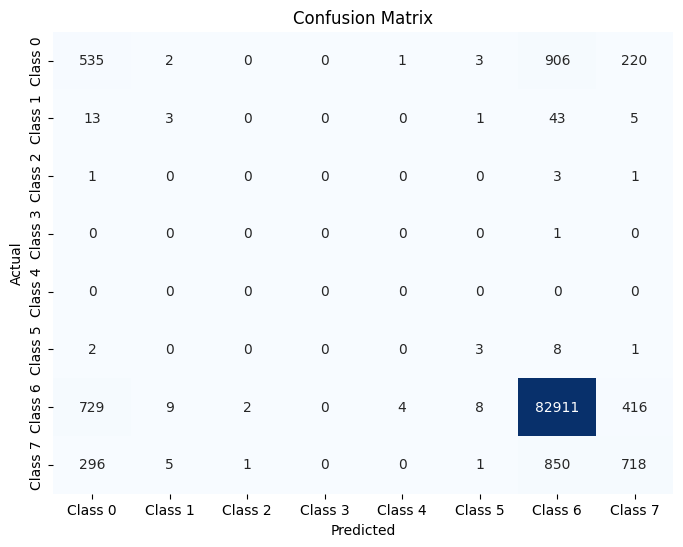

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[f'Class {i}' for i in range(conf_matrix.shape[1])],
            yticklabels=[f'Class {i}' for i in range(conf_matrix.shape[0])])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 3.6 Saving the model

In [ ]:
import pickle

# Save the model
with open('card_model.pkl', 'wb') as file:
    pickle.dump(model, file)

### 3.7 Testing the model using user input

In [ ]:
def check_credit_eligibility():
    # Collect user input
    input_data = {
        'CODE_GENDER': int(input("Enter your gender (1 for Male, 0 for Female): ")),
        'FLAG_OWN_CAR': int(input("Do you own a car? (1 for Yes, 0 for No): ")),
        'FLAG_OWN_REALTY': int(input("Do you own real estate? (1 for Yes, 0 for No): ")),
        'CNT_CHILDREN': int(input("Number of children: ")),
        'AMT_INCOME_TOTAL': float(input("Annual income: ")),
        'NAME_INCOME_TYPE': int(input("Income category (numeric code): ")),
        'NAME_EDUCATION_TYPE': int(input("Education level (numeric code): ")),
        'NAME_FAMILY_STATUS': int(input("Marital status (numeric code): ")),
        'NAME_HOUSING_TYPE': int(input("Housing type (numeric code): ")),
        'DAYS_BIRTH': int(input("Days since birth (negative value): ")),
        'DAYS_EMPLOYED': int(input("Days since employment (negative value for employed): ")),
        'FLAG_MOBIL': int(input("Do you have a mobile phone? (1 for Yes, 0 for No): ")),
        'FLAG_WORK_PHONE': int(input("Do you have a work phone? (1 for Yes, 0 for No): ")),
        'FLAG_PHONE': int(input("Do you have a phone? (1 for Yes, 0 for No): ")),
        'FLAG_EMAIL': int(input("Do you have an email? (1 for Yes, 0 for No): ")),
        'OCCUPATION_TYPE': int(input("Occupation type (numeric code): ")),
        'CNT_FAM_MEMBERS': float(input("Number of family members: "))
    }

    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Predict using the trained model
    prediction = model.predict(input_df)[0]

    # Output result
    if prediction == 0:
        print("You are eligible for a credit card.")
    else:
        print("You are not eligible for a credit card.")

# Call the function
check_credit_eligibility()

Enter your gender (1 for Male, 0 for Female): 1
Do you own a car? (1 for Yes, 0 for No): 3
Do you own real estate? (1 for Yes, 0 for No): 1
Number of children: 3
Annual income: 100000
Income category (numeric code): 2
Education level (numeric code): 4
Marital status (numeric code): 1
Housing type (numeric code): 2
Days since birth (negative value): 10000
Days since employment (negative value for employed): 1000
Do you have a mobile phone? (1 for Yes, 0 for No): 1
Do you have a work phone? (1 for Yes, 0 for No): 1
Do you have a phone? (1 for Yes, 0 for No): 1
Do you have an email? (1 for Yes, 0 for No): 1
Occupation type (numeric code): 1
Number of family members: 2
You are not eligible for a credit card.
